# Shower Fuzzy Inference System

In [1]:
import FuzzySystem as fs
import numpy as np

file = 'shower.fis'

fis = fs.import_fis_matlab(file)

In [2]:
text_file = open(file)
file_content = text_file.read()
print(file_content)
text_file.close()

[System]
Name='shower'
Type='mamdani'
Version=2.0
NumInputs=2
NumOutputs=2
NumRules=9
AndMethod='min'
OrMethod='max'
ImpMethod='min'
AggMethod='max'
DefuzzMethod='centroid'

[Input1]
Name='temp'
Range=[-20 20]
NumMFs=3
MF1='cold':'trapmf',[-30 -30 -15 0]
MF2='good':'trimf',[-10 0 10 0]
MF3='hot':'trapmf',[0 15 30 30]

[Input2]
Name='flow'
Range=[-1 1]
NumMFs=3
MF1='soft':'trapmf',[-3 -3 -0.8 0]
MF2='good':'trimf',[-0.4 0 0.4 0]
MF3='hard':'trapmf',[0 0.8 3 3]

[Output1]
Name='cold'
Range=[-1 1]
NumMFs=5
MF1='closeFast':'trimf',[-1 -0.6 -0.3 0]
MF2='closeSlow':'trimf',[-0.6 -0.3 0 0]
MF3='steady':'trimf',[-0.3 0 0.3 0]
MF4='openSlow':'trimf',[0 0.3 0.6 0]
MF5='openFast':'trimf',[0.3 0.6 1 0]

[Output2]
Name='hot'
Range=[-1 1]
NumMFs=5
MF1='closeFast':'trimf',[-1 -0.6 -0.3 0]
MF2='closeSlow':'trimf',[-0.6 -0.3 0 0]
MF3='steady':'trimf',[-0.3 0 0.3 0]
MF4='openSlow':'trimf',[0 0.3 0.6 0]
MF5='openFast':'trimf',[0.3 0.6 1 0]

[Rules]
1 1, 4 5 (1) : 1
1 2, 2 4 (1) : 1
1 3, 1 2 (1) : 1
2 1, 

In [3]:
inputs = {'temp':[12.05, 12], 'flow':[0.1687, .1]}
result = fis.eval(inputs, verbose=True)

Inputs:
temp: [12.05, 12]
flow: [0.1687, 0.1]
 IF temp is cold and flow is soft THEN cold is openSlow and hot is openFast, fs = [0 0] with weight = 1.00
 IF temp is cold and flow is good THEN cold is closeSlow and hot is openSlow, fs = [0. 0.] with weight = 1.00
 IF temp is cold and flow is hard THEN cold is closeFast and hot is closeSlow, fs = [0. 0.] with weight = 1.00
 IF temp is good and flow is soft THEN cold is openSlow and hot is openSlow, fs = [0. 0.] with weight = 1.00
 IF temp is good and flow is good THEN cold is steady and hot is steady, fs = [0. 0.] with weight = 1.00
 IF temp is good and flow is hard THEN cold is closeSlow and hot is closeSlow, fs = [0. 0.] with weight = 1.00
 IF temp is hot and flow is soft THEN cold is openFast and hot is openSlow, fs = [0. 0.] with weight = 1.00
 IF temp is hot and flow is good THEN cold is openSlow and hot is closeSlow, fs = [0.58 0.75] with weight = 1.00
 IF temp is hot and flow is hard THEN cold is closeSlow and hot is closeFast, fs

In [4]:
fis.show_rules()


Fuzzy System Rules:
IF temp is cold and flow is soft THEN cold is openSlow and hot is openFast
IF temp is cold and flow is good THEN cold is closeSlow and hot is openSlow
IF temp is cold and flow is hard THEN cold is closeFast and hot is closeSlow
IF temp is good and flow is soft THEN cold is openSlow and hot is openSlow
IF temp is good and flow is good THEN cold is steady and hot is steady
IF temp is good and flow is hard THEN cold is closeSlow and hot is closeSlow
IF temp is hot and flow is soft THEN cold is openFast and hot is openSlow
IF temp is hot and flow is good THEN cold is openSlow and hot is closeSlow
IF temp is hot and flow is hard THEN cold is closeSlow and hot is closeFast


<class 'dict'>
<class 'dict'>


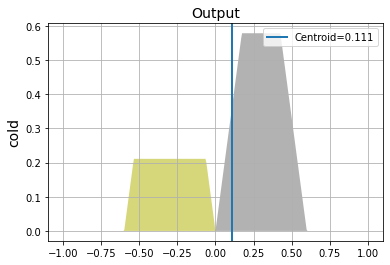

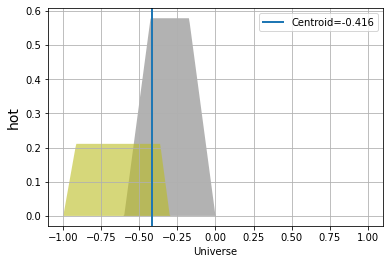

In [5]:
result.show(fs.Centroid, nout=0)